In [1]:
# Parameters
reconstructed_phylogeny_url = "https://github.com/mmore500/hereditary-stratigraph-concept/blob/7f28f68696c67737f6f18054c121769ff616758e/binder/phylogenetic-inference/a=reconstructed_phylogenies+source=nk_lexicaseselection_seed110_pop165_mut.01_snapshot_500.csv.gz"
original_phylogeny_url = "https://osf.io/8ycq7/"


In [2]:
import endomill
from nbmetalog import nbmetalog as nbm


In [3]:
nbm.print_metadata()


context: ci
hostname: db918df90a1c
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 3
nbname: reconstructed_phylogeny_evaluation_mill
nbpath: /opt/hereditary-stratigraph-concept/binder/phylogenetic-inference/reconstructed_phylogeny_evaluation_mill.ipynb
revision: null
session: 95a4f359-38e9-4c0b-8aaf-97ef943963a0
timestamp: 2022-03-09T16:22:46Z00:00




IPython==7.16.1
keyname==0.4.1
yaml==5.3.1
endomill==0.1.3
nbmetalog==0.2.6
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.3.0
json==2.0.9
ipykernel==5.5.3


In [4]:
prefix = (
    'https://github.com/mmore500/hereditary-stratigraph-concept/'
    'blob/7f28f68696c67737f6f18054c121769ff616758e/'
    'binder/phylogenetic-inference/'
)
reconstructed_phylogeny_urls = [
    prefix + 'a=reconstructed_phylogenies+source=nk_lexicaseselection_seed110_pop165_mut.01_snapshot_500.csv.gz',
    prefix + 'a=reconstructed_phylogenies+source=nk_randomselection_seed7_pop100_mut.01_snapshot_5000.csv.gz',
    prefix + 'a=reconstructed_phylogenies+source=nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz',
    prefix + 'a=reconstructed_phylogenies+source=nk_tournamentselection_seed140_pop100_mut.01_snapshot_5000.csv.gz',
]

original_phylogeny_urls = [
            # nk_ecoeaselection_seed110_pop100_mut.01_snapshot_3000.csv
#             'https://osf.io/5d3be/',
            # nk_lexicaseselection_seed110_pop165_mut.01_snapshot_500.csv
            'https://osf.io/8ycq7/',
            # nk_randomselection_seed7_pop100_mut.01_snapshot_5000.csv
            'https://osf.io/ydxt7/',
            # nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv
            'https://osf.io/cz9fk/',
            # nk_tournamentselection_seed140_pop100_mut.01_snapshot_5000.csv
            'https://osf.io/5ubn8/',
]

endomill.instantiate_over(
    parameter_packs=[
        {
            'reconstructed_phylogeny_url': reconstructed_phylogeny_url,
            'original_phylogeny_url': original_phylogeny_url,
        }
        for reconstructed_phylogeny_url, original_phylogeny_url
        in zip(reconstructed_phylogeny_urls, original_phylogeny_urls)
    ],
)


detected executing.endomill.ipynb file
skipping instantiate_over


In [5]:
#define papermil parameters
reconstructed_phylogeny_url: str
original_phylogeny_url: str

# reconstructed_phylogeny_url = reconstructed_phylogeny_urls[0]
# original_phylogeny_url = original_phylogeny_urls[0]


In [6]:
import alifedata_phyloinformatics_convert as apc
from Bio import Phylo
import dendropy
from iterpop import iterpop as ip
from keyname import keyname as kn
from os.path import basename
import pandas as pd
import sys


In [7]:
sys.setrecursionlimit(100000) # data exceeds default recursion limit


In [8]:
nbm.print_metadata()


context: ci
hostname: db918df90a1c
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 8
nbname: reconstructed_phylogeny_evaluation_mill
nbpath: /opt/hereditary-stratigraph-concept/binder/phylogenetic-inference/reconstructed_phylogeny_evaluation_mill.ipynb
revision: null
session: 95a4f359-38e9-4c0b-8aaf-97ef943963a0
timestamp: 2022-03-09T16:22:47Z00:00




IPython==7.16.1
endomill==0.1.3
ipykernel==5.5.3
ipython_genutils==0.2.0
json==2.0.9
keyname==0.4.1
logging==0.5.1.2
nbmetalog==0.2.6
re==2.2.1
yaml==5.3.1
zmq==22.3.0
Bio==1.79
alifedata_phyloinformatics_convert==0.6.0
dendropy==4.5.2
iterpop==0.4.0
pandas==1.1.2


In [9]:
original_df = pd.read_csv(
    f'{original_phylogeny_url}/download',
)

original_df['name'] = original_df['id'].astype(str)
original_df['taxon_label'] = original_df['id'].astype(str)

nbm.print_dataframe_synopsis(original_df)


digest: 86769cfa0dc8832cd433846defef468661779b9b26ec70d5c23c6e09788112b2
manifest:
  ancestor_list: '    210#  ex., [4727]'
  depth: '            59#   ex., 37'
  destruction_time: ' 159#  ex., inf'
  id: '               233#  ex., 4737'
  name: '             233#  ex., 4737'
  num_offspring: '    4#    ex., 0'
  num_orgs: '         8#    ex., 1'
  origin_time: '      176#  ex., 500'
  phenotype: '        187#  ex., [ 0.78551 0.507546 0.298434 0.703895 0.70148 0.897296
    0.852754 0.533489 0.975623 0.814646 0.0274892 0.45607 0.221636 0.767401 0.74891
    0.860365 0.319087 0.293359 0.997853 0.770533 ]'
  taxon_label: '      233#  ex., 4737'
  tot_orgs: '         111#  ex., 1'
  total_offspring: '  15#   ex., 0'
num cols: 12
num cols all na: 0
num cols any na: 0
num na: 0
num rows: 233
num rows all na: 0
num rows any na: 0
size: 111K



In [10]:
reconstructed_df = pd.read_csv(
    f'{reconstructed_phylogeny_url}?raw=true',
    compression='gzip',
)
reconstructed_df['taxon_label'] = reconstructed_df['name']
reconstructed_df['Instance'] = reconstructed_df.apply(
    lambda row: row['Treatment'] + row['Algorithm'],
    axis=1,
)

nbm.print_dataframe_synopsis(reconstructed_df)

data_filename = basename(reconstructed_phylogeny_url)

print(data_filename)


digest: 7105fc8ab9dc0705fcb8092f44240eebb710bc8d0de067d95e37528a689e2402
manifest:
  Algorithm: '     2#     ex., nj'
  Instance: '      36#    ex., differentia=1+policy=RecencyProportionalResolution+target=1024nj'
  Treatment: '     18#    ex., differentia=1+policy=RecencyProportionalResolution+target=1024'
  'Unnamed: 0': '    1674#  ex., 0'
  ancestor_list: ' 46#    ex., [None]'
  branch_length: ' 653#   ex., 0.0'
  id: '            47#    ex., 0'
  index: '         47#    ex., 0'
  name: '          47#    ex., Inner22'
  origin_time: '   829#   ex., 0.0'
  taxon_label: '   47#    ex., Inner22'
num cols: 11
num cols all na: 0
num cols any na: 0
num na: 0
num rows: 1674
num rows all na: 0
num rows any na: 0
size: 868K

a=reconstructed_phylogenies+source=nk_lexicaseselection_seed110_pop165_mut.01_snapshot_500.csv.gz


In [11]:
endomill.add_instance_outpath(
    f'a=reconstructed_phylogeny_evaluation+source={kn.unpack(data_filename)["source"]}.endomill.ipynb',
)


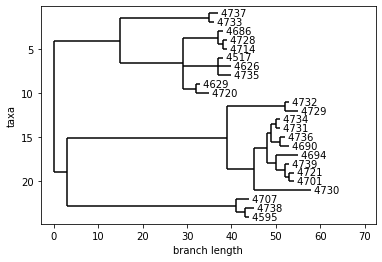

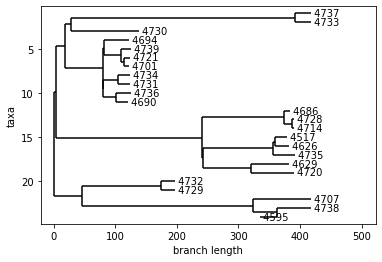

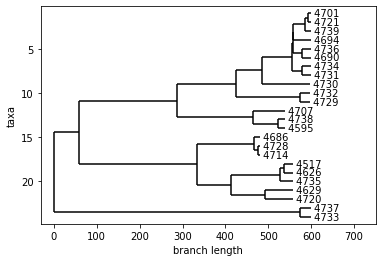

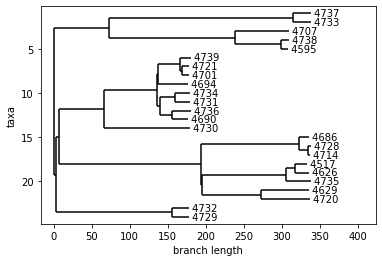

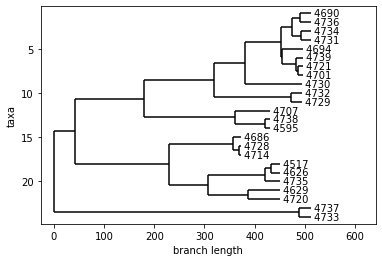

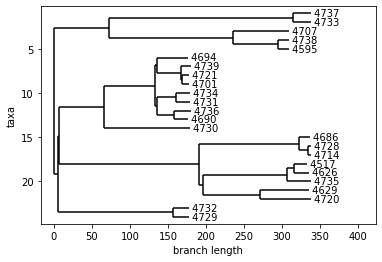

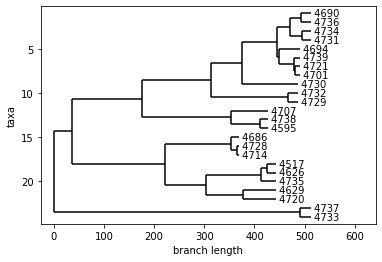

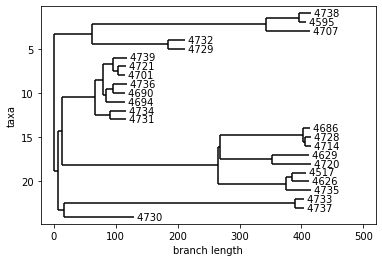

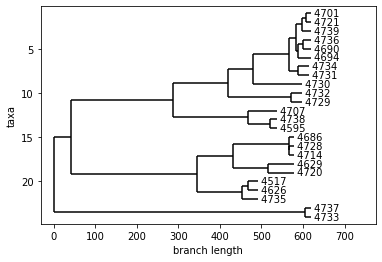

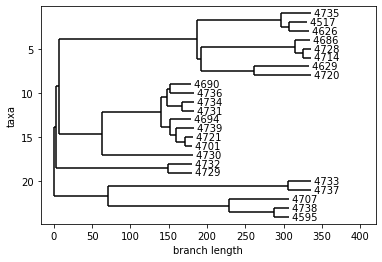

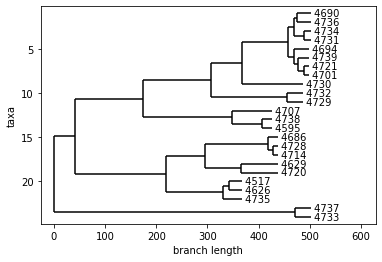

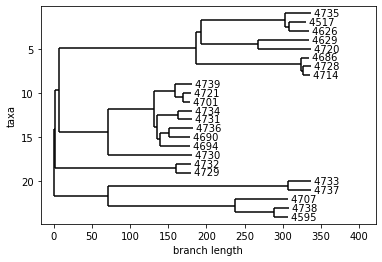

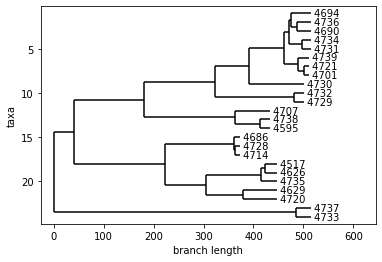

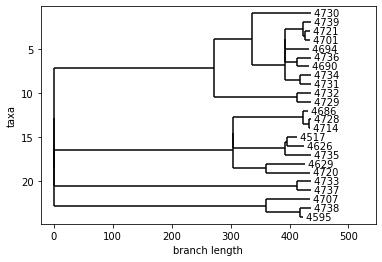

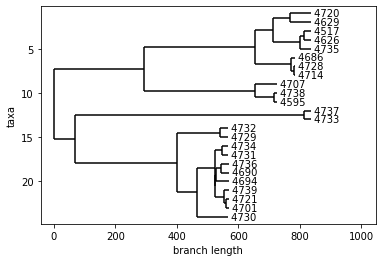

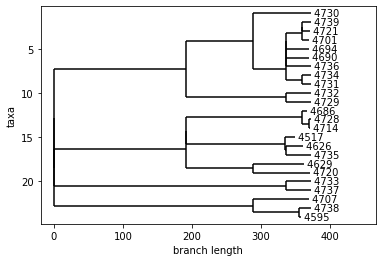

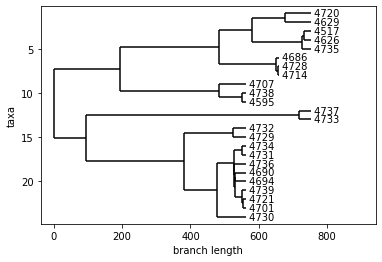

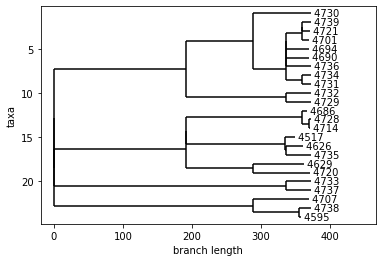

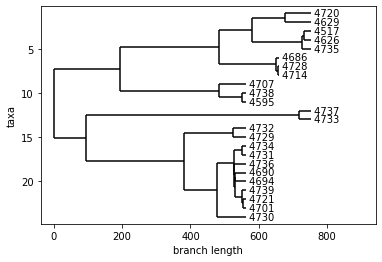

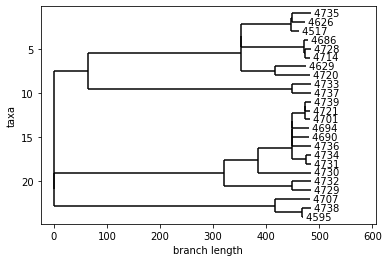

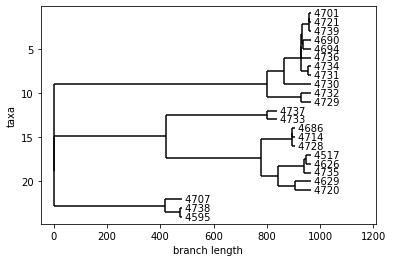

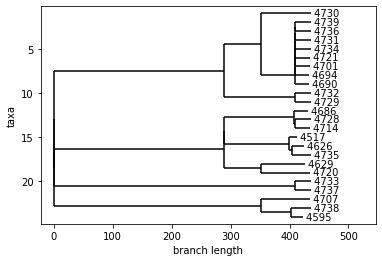

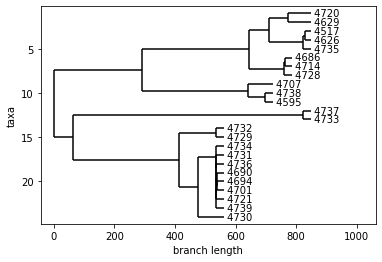

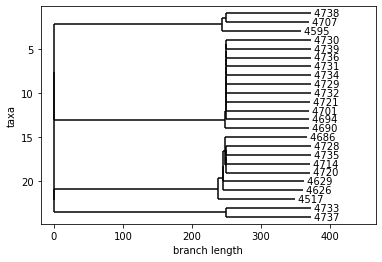

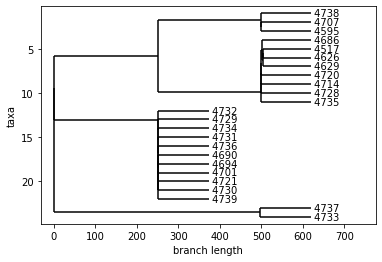

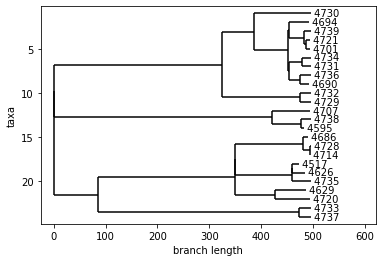

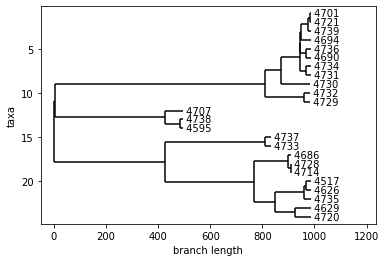

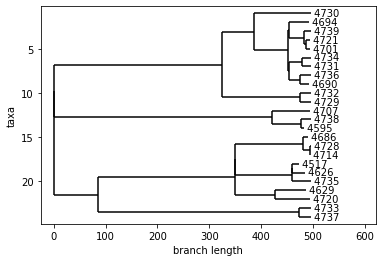

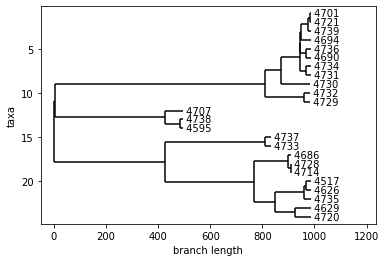

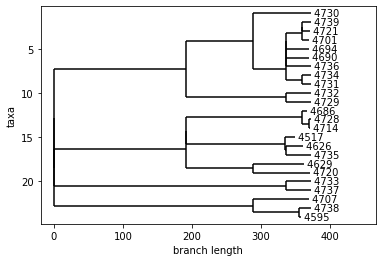

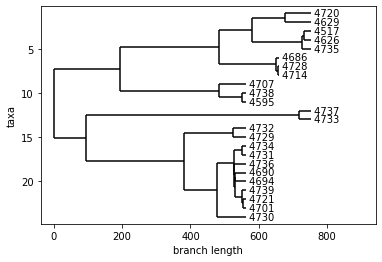

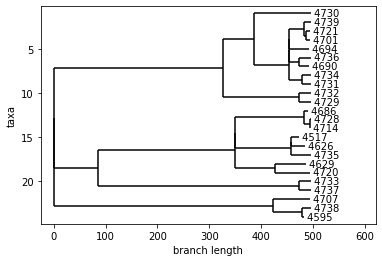

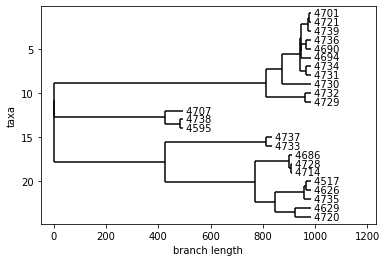

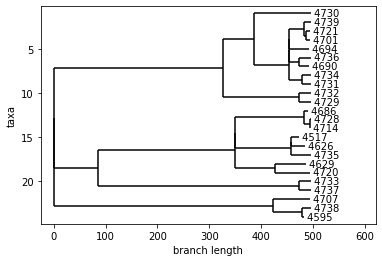

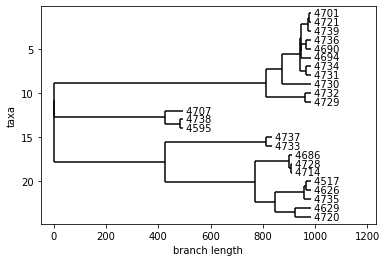

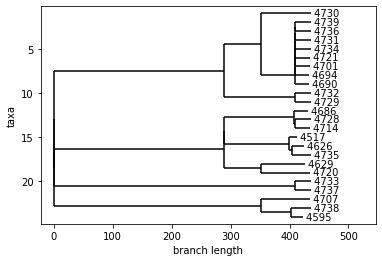

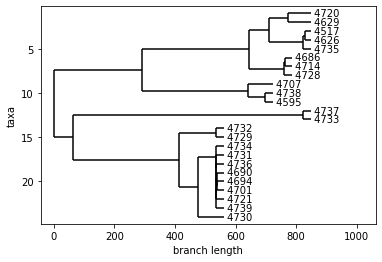

In [12]:
#TODO: teeplot
actual_tree = apc.alife_dataframe_to_biopython_tree(original_df)
for inner_node in actual_tree.get_nonterminals():
    inner_node.name = None
Phylo.draw(actual_tree)
for instance, group in reconstructed_df.groupby('Instance'):
    tree = apc.alife_dataframe_to_biopython_tree(group)
    tree.root_at_midpoint()
    Phylo.draw(
        tree,
        label_func=lambda node: None if 'Inner' in str(node) else str(node),
    )


In [13]:
actual_tree = apc.alife_dataframe_to_dendropy_tree(original_df)
for inner_node in actual_tree.internal_nodes():
    inner_node.taxon = None

records = []
for instance, group in reconstructed_df.groupby('Instance'):
    tree = apc.alife_dataframe_to_dendropy_tree(group)
    tree.migrate_taxon_namespace(actual_tree.taxon_namespace)
    unweighted_robinson_foulds = dendropy.calculate.treecompare.unweighted_robinson_foulds_distance(
        actual_tree,
        tree,
    )
#     weighted_robinson_foulds = dendropy.calculate.treecompare.weighted_robinson_foulds_distance(
#         actual_tree,
#         tree,
#     )
#     euclidean = dendropy.calculate.treecompare.euclidean_distance(
#         actual_tree,
#         tree,
#     )

    records.append({
        **{
            'Instance': 'Instance',
            'Algorithm': ip.popsingleton(group['Algorithm'].unique()),
            'Treatment': ip.popsingleton(group['Treatment'].unique()),
            'Unweighted Robinson Foulds Distance Error': unweighted_robinson_foulds,
#             'Weighted Robinson Foulds Distance Error': weighted_robinson_foulds,
#             'Euclidean Distance Error': euclidean,
        },
        **kn.unpack(ip.popsingleton(group['Treatment'].unique())),
    })


res_df = pd.DataFrame.from_records(records)


In [14]:
res_df


,Instance,Algorithm,Treatment,Unweighted Robinson Foulds Distance Error,differentia,policy,target,_
0,Instance,nj,differentia=1+policy=RecencyProportionalResolu...,8,1,RecencyProportionalResolution,1024,differentia=1+policy=RecencyProportionalResolu...
1,Instance,upgma,differentia=1+policy=RecencyProportionalResolu...,4,1,RecencyProportionalResolution,1024,differentia=1+policy=RecencyProportionalResolu...
2,Instance,nj,differentia=1+policy=RecencyProportionalResolu...,6,1,RecencyProportionalResolution,512,differentia=1+policy=RecencyProportionalResolu...
3,Instance,upgma,differentia=1+policy=RecencyProportionalResolu...,2,1,RecencyProportionalResolution,512,differentia=1+policy=RecencyProportionalResolu...
4,Instance,nj,differentia=1+policy=RecencyProportionalResolu...,6,1,RecencyProportionalResolution,64,differentia=1+policy=RecencyProportionalResolu...
5,Instance,upgma,differentia=1+policy=RecencyProportionalResolu...,2,1,RecencyProportionalResolution,64,differentia=1+policy=RecencyProportionalResolu...
6,Instance,nj,differentia=1+policy=TaperedDepthProportionalR...,12,1,TaperedDepthProportionalResolution,1024,differentia=1+policy=TaperedDepthProportionalR...
7,Instance,upgma,differentia=1+policy=TaperedDepthProportionalR...,6,1,TaperedDepthProportionalResolution,1024,differentia=1+policy=TaperedDepthProportionalR...
8,Instance,nj,differentia=1+policy=TaperedDepthProportionalR...,6,1,TaperedDepthProportionalResolution,512,differentia=1+policy=TaperedDepthProportionalR...
9,Instance,upgma,differentia=1+policy=TaperedDepthProportionalR...,2,1,TaperedDepthProportionalResolution,512,differentia=1+policy=TaperedDepthProportionalR...


In [15]:
nbm.print_dataframe_synopsis(res_df)


digest: ee60696e4149b834ab508dd61d5ac9a6ed3490e9a576d95f068081bc759ef7e6
manifest:
  Algorithm: '                                 2#   ex., nj'
  Instance: '                                  1#   ex., Instance'
  Treatment: '                                 18#  ex., differentia=1+policy=RecencyProportionalResolution+target=1024'
  Unweighted Robinson Foulds Distance Error: ' 9#   ex., 8'
  _: '                                         18#  ex., differentia=1+policy=RecencyProportionalResolution+target=1024'
  differentia: '                               3#   ex., 1'
  policy: '                                    2#   ex., RecencyProportionalResolution'
  target: '                                    3#   ex., 1024'
num cols: 8
num cols all na: 0
num cols any na: 0
num na: 0
num rows: 36
num rows all na: 0
num rows any na: 0
size: 20K



In [16]:
res_df.to_csv(
    f'a=reconstructed_phylogeny_evaluation+source={kn.unpack(data_filename)["source"]}',
    compression='gzip',
)
